In [101]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [34]:
df = pd.read_csv('TAMO_stock.csv')

In [67]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y').dt.date
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')


In [68]:
df.shape

(1733, 2)

In [69]:
df.dtypes

,0
Date,object
Price,float64


In [70]:
df.head()

,Date,Price
0,2024-11-14,774.30
1,2024-11-13,786.25
2,2024-11-12,784.85
3,2024-11-11,804.70
4,2024-11-08,805.45


In [97]:
# taking 100 past entries
df_last_year = df.head(50)
df_last_year = df_last_year.iloc[::-1]

In [98]:
df_last_year.shape

(50, 6)

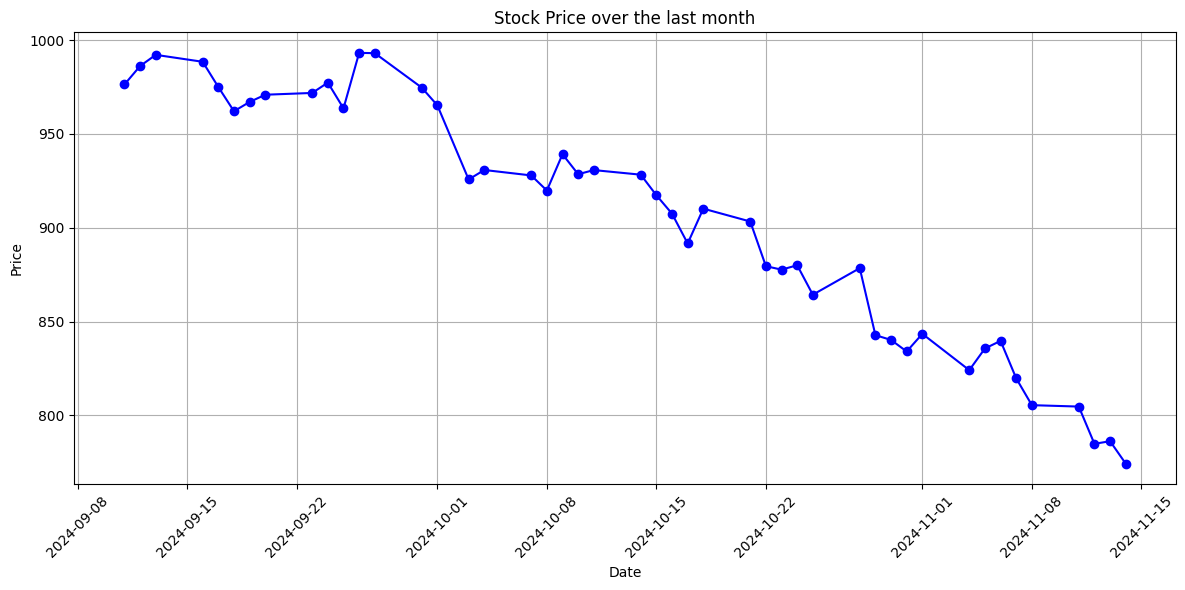

In [125]:
plt.figure(figsize=(12, 6))
plt.plot(df_last_year["Date"], df_last_year['Price'], marker='o', linestyle='-', color='b')
plt.title('Stock Price over the last month')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.xticks(rotation=45)
# plt.yticks([])
plt.tight_layout()
plt.show()


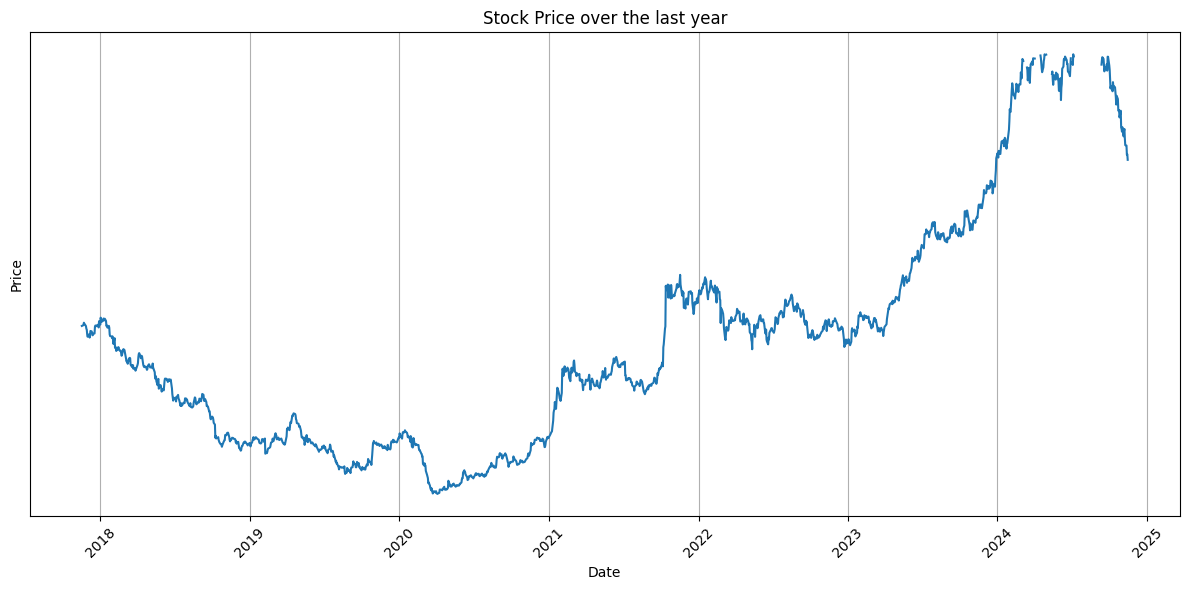

In [85]:
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df['Price'])
plt.title('Stock Price over the past 7 years')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks([])
plt.tight_layout()
plt.show()


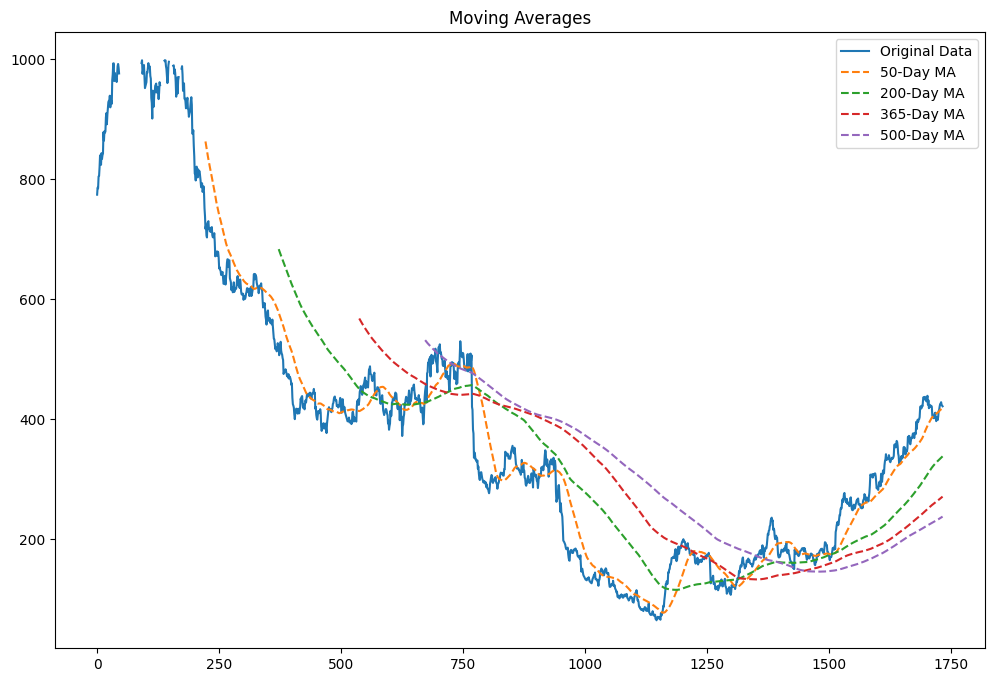

In [83]:
df['MA_50'] = df['Price'].rolling(window=50).mean()
df['MA_200'] = df['Price'].rolling(window=200).mean()
df['MA_365'] = df['Price'].rolling(window=365).mean()
df['MA_500'] = df['Price'].rolling(window=500).mean()

# Plotting moving averages
plt.figure(figsize=(12, 8))
plt.plot(df['Price'], label='Original Data')
plt.plot(df['MA_50'], label='50-Day MA', linestyle='dashed')
plt.plot(df['MA_200'], label='200-Day MA', linestyle='dashed')
plt.plot(df['MA_365'], label='365-Day MA', linestyle='dashed')
plt.plot(df['MA_500'], label='500-Day MA', linestyle='dashed')
plt.legend()
plt.title('Moving Averages')
plt.show()

In [102]:
result = adfuller(df['Price'].dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
if result[1] > 0.05:
    print("Data is non-stationary. Differencing may be needed.")
else:
    print("Data is stationary.")

ADF Statistic: -1.7055612961522493
p-value: 0.4282494317288183
Data is non-stationary. Differencing may be needed.


In [103]:
model = ARIMA(df['Price'], order=(2, 1, 2))
arima_result = model.fit()

In [104]:
print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1733
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -5975.619
Date:                Sun, 17 Nov 2024   AIC                          11961.238
Time:                        16:54:05   BIC                          11988.523
Sample:                             0   HQIC                         11971.330
                               - 1733                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1206      0.102      1.181      0.238      -0.080       0.321
ar.L2          0.8443      0.100      8.409      0.000       0.648       1.041
ma.L1         -0.1390      0.112     -1.242      0.2

In [108]:
df["Fitted"].shape

(1733,)

In [109]:
df["Price"].shape

(1733,)

In [119]:
df_test = df.iloc[1:]


In [120]:
df_test.shape

(1732, 7)

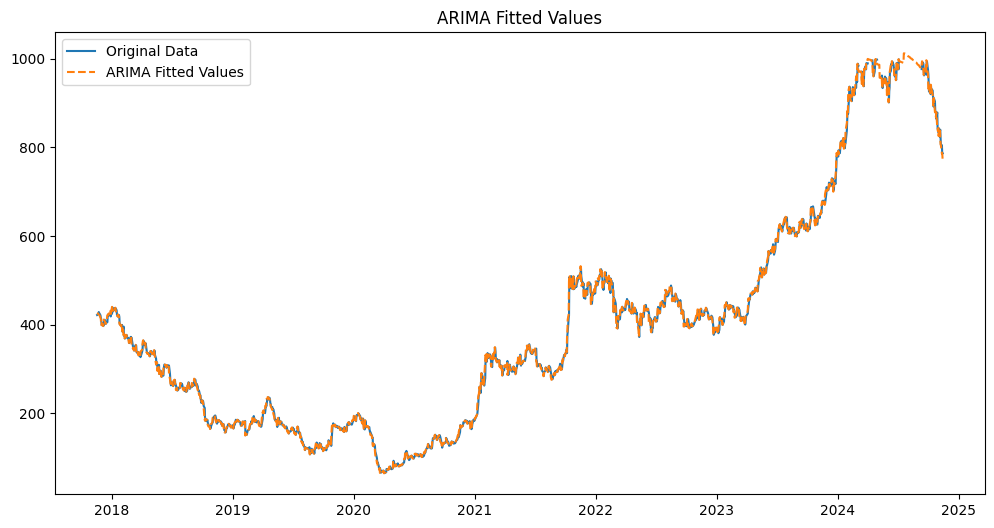

In [121]:
# df['Fitted'] = arima_result.fittedvalues
plt.figure(figsize=(12, 6))
plt.plot(df_test["Date"] , df_test['Price'], label='Original Data')
plt.plot(df_test["Date"] , df_test['Fitted'], label='ARIMA Fitted Values', linestyle='dashed')
plt.legend()
plt.title('ARIMA Fitted Values')
plt.show()

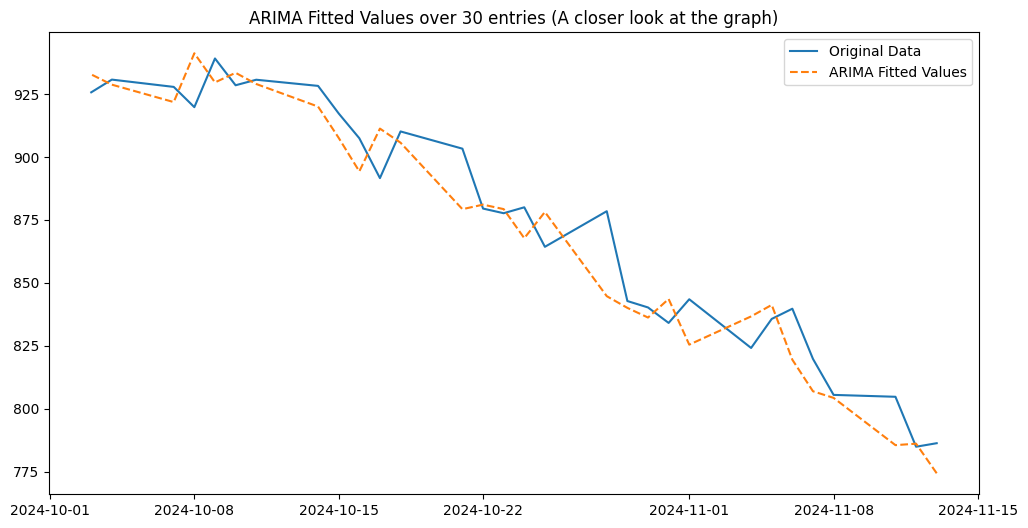

In [123]:
df['Fitted'] = arima_result.fittedvalues
plt.figure(figsize=(12, 6))
plt.plot(df_test["Date"].head(30) , df_test['Price'].head(30), label='Original Data')
plt.plot(df_test["Date"].head(30) , df_test['Fitted'].head(30), label='ARIMA Fitted Values', linestyle='dashed')
plt.legend()
plt.title('ARIMA Fitted Values over 30 entries (A closer look at the graph)')
plt.show()

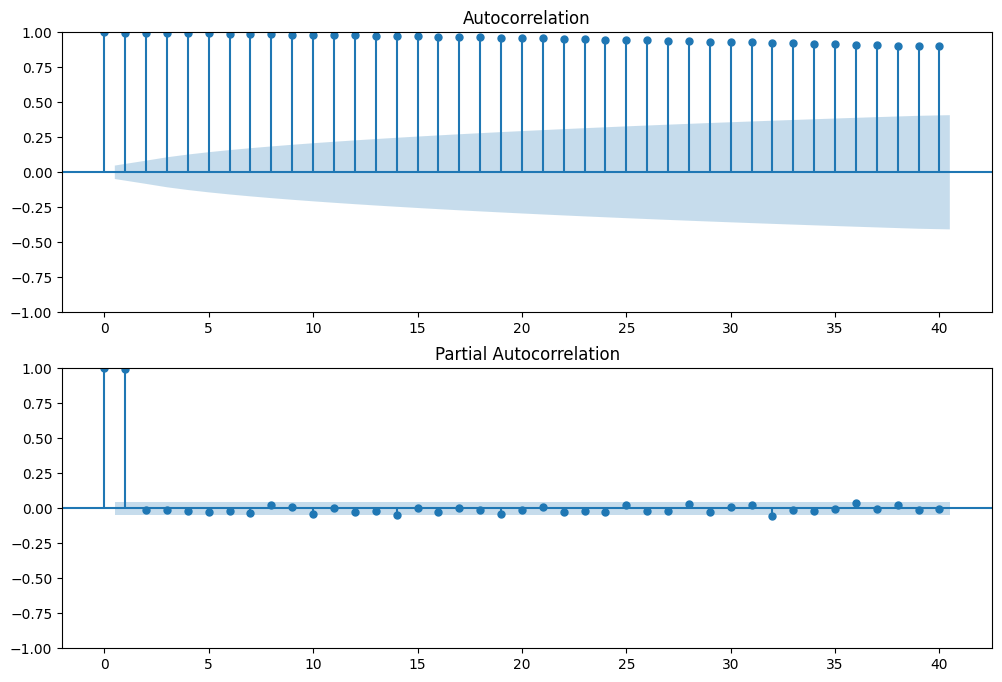

In [124]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(df['Price'].dropna(), lags=40, ax=ax[0])
plot_pacf(df['Price'].dropna(), lags=40, ax=ax[1])
plt.show()